# AIRDOS Data Parser

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [3]:
fto = 'DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,548))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)

# Convert strings to numbers
#df = df.apply(pd.to_numeric, errors='ignore')

#df.iloc[:,0:13]

#df

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,8,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Concatenate RMC and GGA lines to one table

In [4]:
df = df.reset_index(drop=True)
df1 = df.loc[df[0]=='$GPRMC']
df1 = df1.iloc[:,0:12]
df2 = df.iloc[df.loc[df[0]=='$GPRMC'].index+1]
df2 = df2.iloc[:,0:15]
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df5 = pd.concat([df1,df2], axis=1,  ignore_index=True)
# Convert NMEA time to pandas time
df5[9] = df5[9].astype(str)
df5[1] = df5[1].astype(str)
df5[1] = pd.to_datetime(df5[9]+df5[1], format='%d%m%y%H%M%S.%f',errors='coerce')#.dt.time
#df5=df5.rename(columns = {2:'time'})#
#df5 = df5.iloc[:,0:20]

df5.drop(df5[df5[24]!='M'].index, inplace=True)

df5[21] = pd.to_numeric(df5[21],errors='coerce')

df6 = pd.DataFrame()
df6['time']=df5[1]
df6['altitude'] = df5[21]
df6['Lat'] = df5[3]
df6['Lats'] = df5[4]
df6['Lon'] = df5[5]
df6['Lons'] = df5[6]
df6['time'] = pd.to_datetime(df6.time)
df6.set_index('time', inplace=True)
df6.dropna(axis=0,inplace=True)
df6 = df6[pd.notnull(df6.index)]
df6.to_csv('ble.txt')
#df6.iloc[50:100]

## Calculate Flux

50900


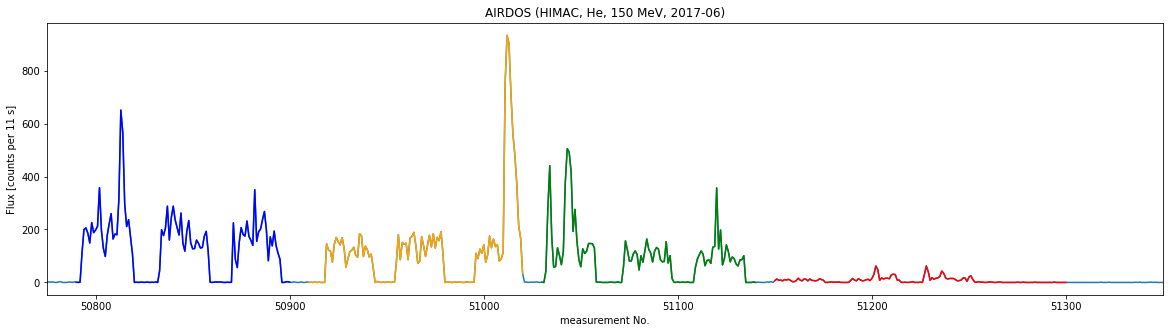

In [5]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(22,544)].sum(axis=1)
#rc['sum']

plt.figure(figsize=(20,5))

#rc['sum'].plot()
rc.ix[50775:51350,'sum'].plot()

#plt.ylim([0,20])
e1 = [50790,50900]
e2 = [50910,51020]
e3 = [51030,51140]
e4 = [51150,51300]

rc.ix[e1[0]:e1[1],'sum'].plot(c='b')
rc.ix[e2[0]:e2[1],'sum'].plot(c='orange')
rc.ix[e3[0]:e3[1],'sum'].plot(c='g')
rc.ix[e4[0]:e4[1],'sum'].plot(c='r')

plt.title('AIRDOS (HIMAC, He, 150 MeV, 2017-06)')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 11 s]')

print e1[1]

## Energy spectrum

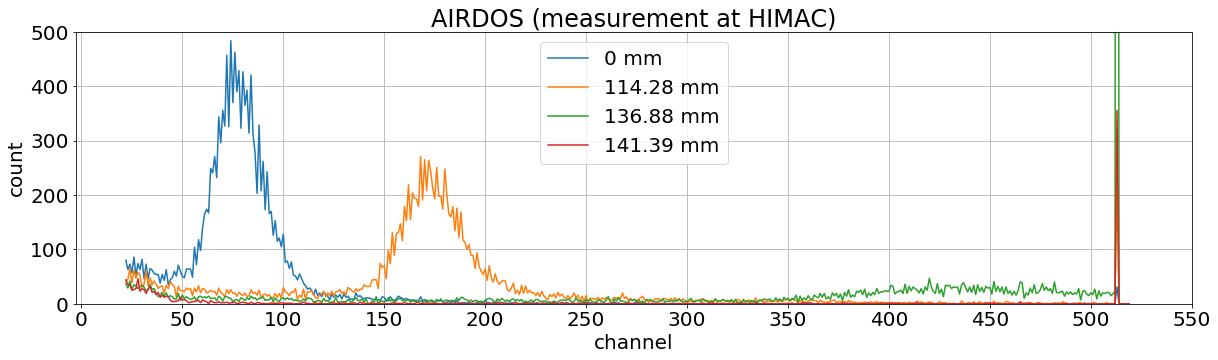

In [79]:
matplotlib.rcParams.update({'font.size': 20})

'''
plt.figure(figsize=(20,5))
rc['sum'][91:154].plot(c='blue')
rc['sum'][155:235].plot(c='red')
rc['sum'][236:296].plot(c='green')
rc['sum'][300:350].plot(c='yellow')
'''

ener1 = rc.ix[e1[0]:e1[1],22:520].sum()
ener2 = rc.ix[e2[0]:e2[1],22:520].sum()
ener3 = rc.ix[e3[0]:e3[1],22:520].sum()
ener4 = rc.ix[e4[0]:e4[1],22:520].sum()
 
plt.figure(figsize=(20,5))
#plt.yscale('log')

plt.plot(ener1, label='0 mm')
plt.plot(ener2, label='114.28 mm')
plt.plot(ener3, label='136.88 mm')
plt.plot(ener4, label='141.39 mm')
plt.ylim([0,500])
plt.legend()
plt.title('AIRDOS (measurement at HIMAC)')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,600,50))
plt.grid()


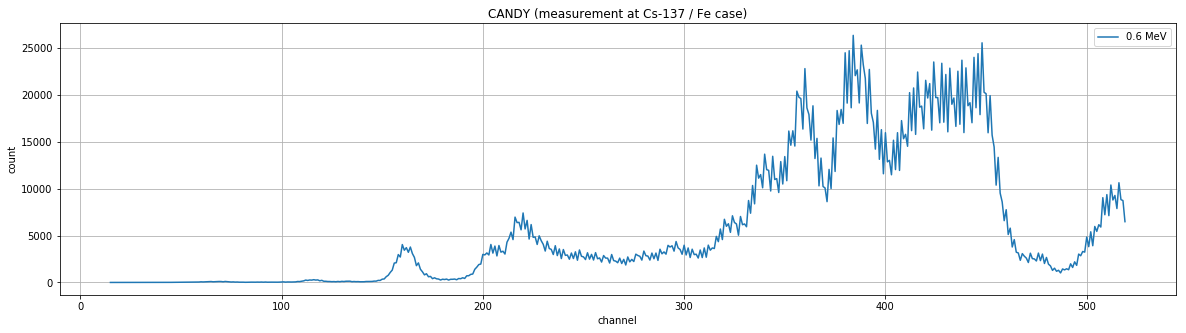

In [133]:
matplotlib.rcParams.update({'font.size': 10})

ener1 = rc.ix[0:350,15:520].sum()

plt.figure(figsize=(20,5))
plt.plot(ener1, label='0.6 MeV')
#plt.ylim([0,300])
#plt.xlim([0,100])
#plt.yscale('log')
plt.legend()
plt.title('CANDY (measurement at Cs-137 / Fe case)')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(0,101,10))
#plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.grid()

Save histogram data to file.

In [6]:
ener1.to_csv('ener1.csv')
ener2.to_csv('ener2.csv')
ener3.to_csv('ener3.csv')
ener4.to_csv('ener4.csv')


In [2]:
%matplotlib qt
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv

def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))
fileName="ener1.csv"
accessMode="r"
with open(fileName,accessMode) as myCSVfile:
	data=list(csv.reader(myCSVfile))
	x,y=[],[]
	for i in data:
		x.append(int(i[0]))
		y.append(float(i[1]))

	plt.plot(x,y)
	points=plt.ginput(2)
	X1=int(round(points[0][0]))
	X2=int(round(points[1][0]))
	delta_x=abs(X2-X1)
	delta_y=float(y[X2])-float(y[X1])
	if y[X2]>y[X1]:
		a=delta_y/delta_x
		b=X1
	if y[X2]<y[X1]:
		a=-(delta_y/delta_x)
		b=X1
	spread=np.linspace(X1,X2,X2-X1+1)
	peak=y[X1:X2]-(a*spread[:-1]+b)
	amp=max(y[X1:X2])
	cen=y[X1]
	wid=float(y[X2])-float(y[X1])

	popt,pcov = curve_fit(gaussian, spread[:-1], peak, p0=[amp, cen, wid])

	plt.plot(spread[:-1],peak,'b+:', label='data'
	plt.plot(spread[:-1], gaussian(spread[:-1], *popt), 'r-', label='fit')
	plt.show()
	#<end examples/doc_model1.py>


/usr/lib/python2.7/dist-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


## Plot Altitude

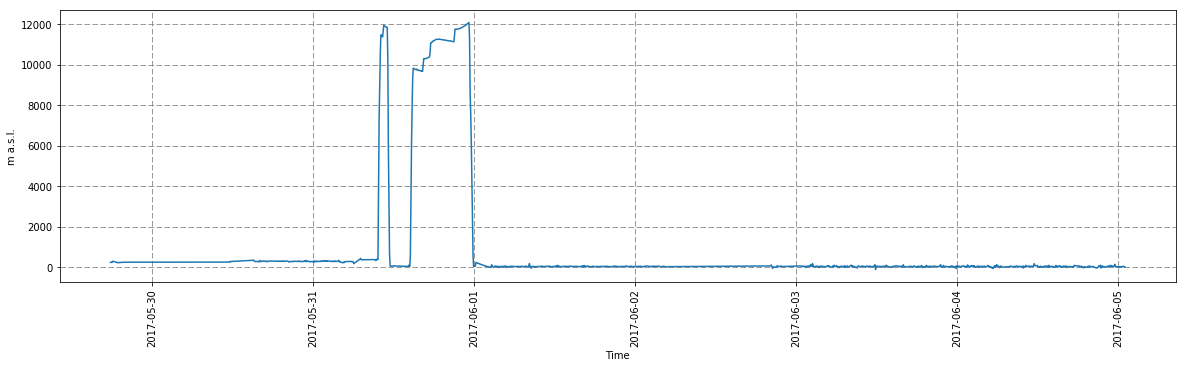

In [5]:
plt.figure(figsize=(20,5))

#df6.set_index('time').altitude.plot()
plt.plot(df6.index, df6.altitude)

plt.xticks(rotation='vertical')
#plt.gcf().autofmt_xdate()
#df5[:17000].plot(x=2,y='avgsnr',figsize=(12,5),xticks=['09:30:00','10:00:00','10:30:00','11:00:00','11:30:00','12:00:00','12:30:00','13:00:00','13:30:00','14:00:00'])
plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.xlabel('Time')
plt.ylabel('m a.s.l.')

## Convert Grades/Minutes to Grades

In [6]:
df6['Lat'] = df6['Lat'].astype(float)
df6['Lon'] = df6['Lon'].astype(float)

df6['Lats'] = df6['Lats'].str.replace('N','1')
df6['Lats'] = df6['Lats'].str.replace('S','-1')
df6['Lons'] = df6['Lons'].str.replace('E','1')
df6['Lons'] = df6['Lons'].str.replace('W','-1')

df6['LatDD'] = (df6.Lat/100).fillna(0).astype(int)
df6['LatDD'] = df6.LatDD + (df6.Lat - 100.0*df6.LatDD)/60.0
df6['LatDD'] = df6.LatDD * df6['Lats'].astype(float)  


df6['LonDD'] = (df6.Lon/100).fillna(0).astype(int)
df6['LonDD'] = df6.LonDD + (df6.Lon - 100.0*df6.LonDD)/60.0
df6['LonDD'] = df6.LonDD * df6['Lons'].astype(float)  

## Plot Map

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


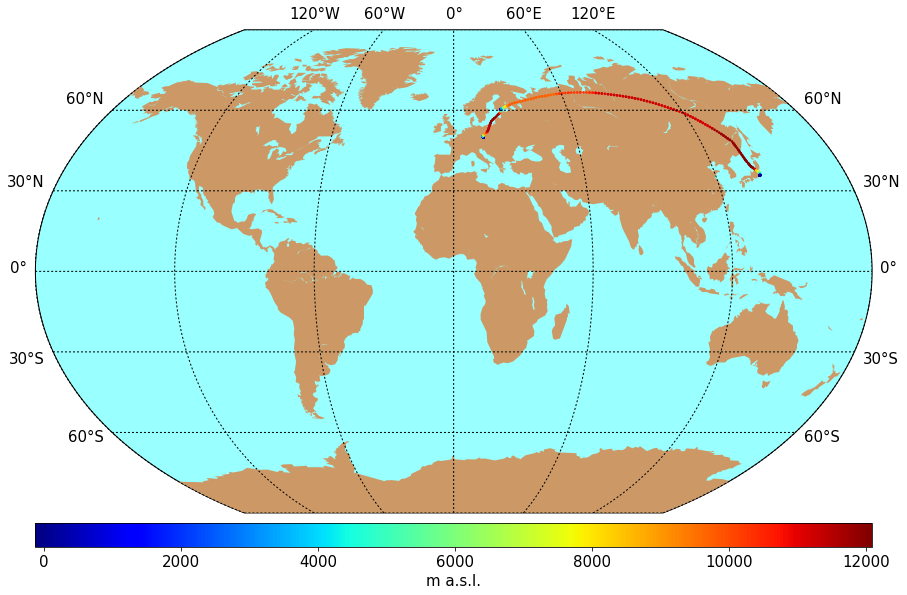

In [7]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

plt.figure(figsize=(15,15))
matplotlib.rcParams.update({'font.size': 15})


# draw map with markers for float locations
m = Basemap(projection='kav7',lon_0=0)
# create Basemap instance.
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')

x, y = m(df6.LonDD.tolist(),df6.LatDD.tolist())
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,1,0])
#m.scatter(df6.LonDD.tolist(),df6.LatDD.tolist(),3,marker='o',color='r')
im1 = m.scatter(x,y,c=df6.altitude.tolist(),s=7,marker='o',  linewidth='0', cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('m a.s.l.')
plt.show()

## Plot Flux

In [4]:

date = np.nan #pd.to_datetime('210317000000.00', format='%d%m%y%H%M%S.%f')
altitude = np.nan
LatDD = np.nan
LonDD = np.nan
for i,r in df.iterrows():
    if (r[0] == '$GPRMC'):
        date = pd.to_datetime(str(r[9])+str(r[1]), format='%d%m%y%H%M%S.%f',errors='coerce')
    '''
        Lat = float(r[3])
        Lon = float(r[5])

        if (r[4] == 'N'):
            Lats = 1
        else:
            Lats = -1

        if (r[6] == 'E'):
            Lons = 1
        else:
            Lons = -1

        LatDD = int(Lat/100)
        LatDD = LatDD + (Lat - 100.0*LatDD)/60.0
        LatDD = LatDD * Lats  

        LonDD = int(Lon/100)
        LonDD = LonDD + (Lon - 100.0*LonDD)/60.0
        LonDD = LonDD * Lons  
    '''       
    if (r[0] == '$GPGGA'):
        altitude = r[9]
    #r[20] = date
    df.set_value(i,20,date)
    df.set_value(i,21,altitude)
    #df.set_value(i,22,LatDD)
    #df.set_value(i,23,LonDD)

#df.to_csv('complete.csv')

In [5]:
#dfo = df[[25,26,27]].reset_index().groupby(20).sum()
#df.reset_index(inplace=True)
dfo = df
#dfo.reset_index(inplace=True)
dfo.drop(dfo[dfo[0]=='$GPRMC'].index, inplace=True)
dfo.drop(dfo[dfo[0]=='$GPGGA'].index, inplace=True)

#dfo = dfo[range(20,544)].groupby(20).sum()
#dfo

#df.iloc[20:40,0:30]
#dfo['sum'] = dfo[range(27,544)].sum(axis=1)

dfo.to_csv('radiation.csv')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


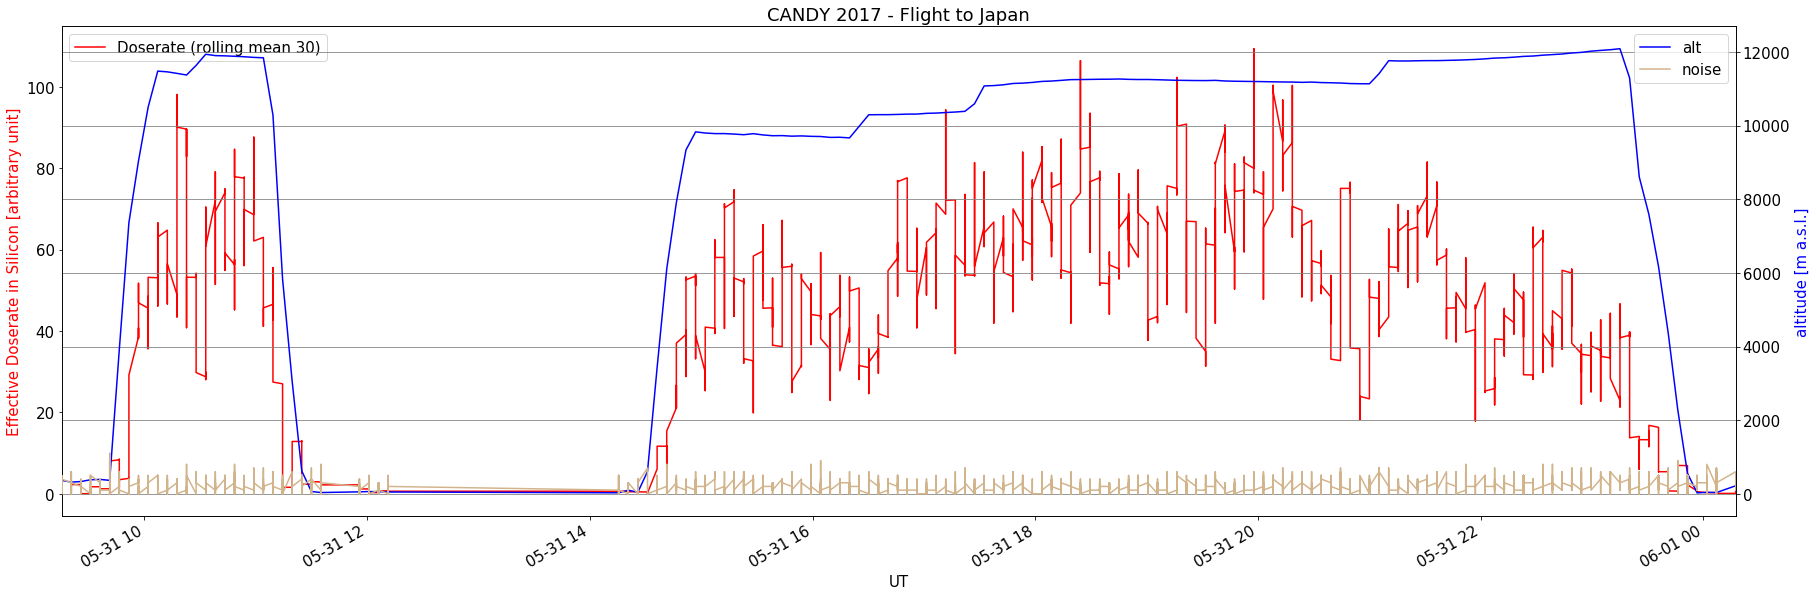

In [12]:
plt.figure(figsize=(30,10))
matplotlib.rcParams.update({'font.size': 15})

dfo = pd.read_table('radiation.csv', sep=',', header=0)
dfo = dfo.dropna(how='any')
dfo['20'] = pd.to_datetime(dfo['20'])
dfo = dfo.set_index(['20'])
NOISE_LEVEL=22
dfo[range(NOISE_LEVEL,500)] = dfo[range(NOISE_LEVEL,500)].mul(range(1,500+1-NOISE_LEVEL),axis=1)
dfo['rad'] = dfo[range(NOISE_LEVEL,500)].sum(axis=1)
xx = dfo.loc['2017-05-31 09:00:00':'2017-06-01 01:00:00']
#xx = dfo
#xx = dfo
#pandas.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
WINDOW = 30
xx['rad'] = pd.rolling_mean(xx['rad'],WINDOW)

xx['rad'].plot(c='r', label='Doserate (rolling mean '+str(WINDOW)+')')
plt.xlabel('UT')
plt.ylabel('Effective Doserate in Silicon [arbitrary unit]', color='red')
#, xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
plt.legend(loc=2)

ax = plt.twinx()
xx['21'].plot(c='b',label='alt')
plt.plot(xx['18']*100,c='tan',label='noise',zorder=10)
#plt.plot(xx[19]*5000-xx['18']*100,c='green',label='corr')
plt.ylabel('altitude [m a.s.l.]', color='blue')
#plt.ylim([0,500])
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()
plt.title('CANDY 2017 - Flight to Japan')


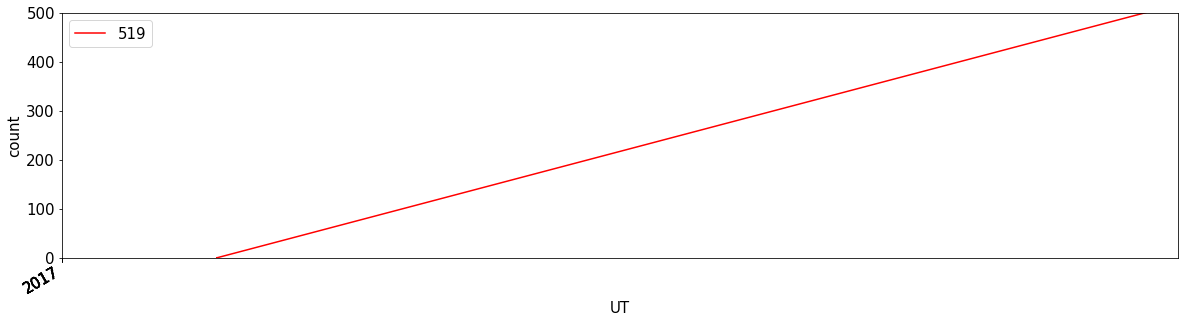

In [13]:
dfo = pd.read_table('radiation.csv', sep=',', header=None)

#plt.figure(figsize=(10,5))

dfo[0] = pd.to_datetime(dfo[0])

dfo = dfo.set_index([0])

#xx = dfo.loc['2017-03-26 00:00:00':'2017-03-30 00:00:00']
xx = dfo

xx.plot(y=519, c='r', xticks=['2017-03-27 00:00','2017-03-27 12:00','2017-03-28 00:00','2017-03-28 12:00','2017-03-29 00:00'],figsize=(20,5))
#plt.plot(dfo[0], dfo[519], c='r')

#plt.xticks(rotation='vertical')
#plt.gcf().autofmt_xdate()
plt.ylim([0,500])
plt.ylabel('count')
plt.xlabel('UT')

## Calculate Flux

In [ ]:
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

#rc.to_csv('ble.txt')

#rc['sum'] = rc[range(24,544)].sum(axis=1)
rc['sum'] = rc[range(25,544)].sum(axis=1)
#rc['sum']

In [33]:
#df.iloc[20:40,0:30]
#df = df.set_index([20])
xx = df.loc['2017-03-28 14:26:39':'2017-03-28 20:26:42',0:24]

xx.loc[xx[0]=='$GPRMC']

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,21,22,23,24
20,,,,,,,,,,,,,,,,,,,,,
2017-03-28 14:27:44,$GPRMC,142744.00,A,1026.78767,N,07530.93372,W,0.103,NaN,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,14.4,NaN,NaN,NaN
2017-03-28 14:27:45,$GPRMC,142745.00,A,1026.78749,N,07530.93385,W,0.049,NaN,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2017-03-28 14:33:06,$GPRMC,143306.00,A,1026.73337,N,07530.83158,W,2.246,95.85,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
2017-03-28 14:33:07,$GPRMC,143307.00,A,1026.73333,N,07530.83094,W,2.075,95.32,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN
2017-03-28 14:38:27,$GPRMC,143827.00,A,1026.70256,N,07530.76773,W,10.526,169.68,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,NaN
2017-03-28 14:38:28,$GPRMC,143828.00,A,1026.69954,N,07530.76756,W,10.679,174.86,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,10.5,NaN,NaN,NaN
2017-03-28 14:43:50,$GPRMC,144350.00,A,1032.66281,N,07530.79821,W,264.103,338.80,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,911.4,NaN,NaN,NaN
2017-03-28 14:43:51,$GPRMC,144351.00,A,1032.73128,N,07530.82607,W,265.043,337.39,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,923.8,NaN,NaN,NaN
2017-03-28 14:49:11,$GPRMC,144911.00,A,1012.47784,N,07530.48631,W,384.672,171.66,280317,...,NaN,NaN,NaN,NaN,NaN,NaN,936.7,NaN,NaN,NaN


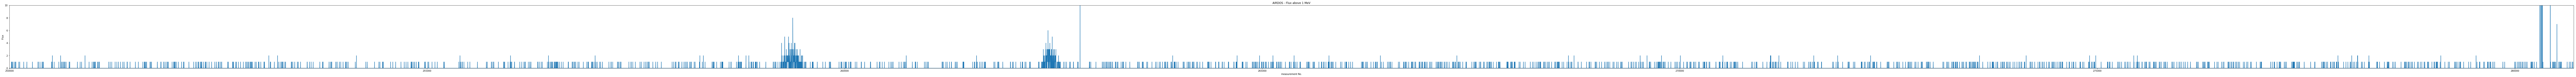

In [33]:
#df.loc[20:100,27:46]
#rc.loc[20:100,27:46]
plt.figure(figsize=(200,5))

rc.loc[250000:,547].plot()
plt.ylim([0,10])
plt.title('AIRDOS - Flux above 1 MeV')
plt.xlabel('measurement No.')
plt.ylabel('Flux')


In [140]:
rc
rc.to_csv('rc.csv')

In [53]:
ener1

22       64.0
23       36.0
24       56.0
25       47.0
26       52.0
27       46.0
28       42.0
29       46.0
30       40.0
31       40.0
32       37.0
33       39.0
34       35.0
35       29.0
36       26.0
37       26.0
38       22.0
39       28.0
40       36.0
41       23.0
42       27.0
43       25.0
44       25.0
45       23.0
46       18.0
47       24.0
48       24.0
49       12.0
50       15.0
51        9.0
        ...  
490       1.0
491       2.0
492       1.0
493       0.0
494       2.0
495       0.0
496       1.0
497       2.0
498       1.0
499       0.0
500       2.0
501       0.0
502       2.0
503       1.0
504       0.0
505       2.0
506       0.0
507       1.0
508       0.0
509       2.0
510       0.0
511       0.0
512       1.0
513    5992.0
514       0.0
515       0.0
516       0.0
517       0.0
518       0.0
519       0.0
dtype: float64